# Autism Spectrum Disorder(ASD) Prediction-ML 

## Importing required Libraries and the Dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [2]:
# df = pd.read_csv('/content/sample_data/train.csv')
df=pd.read_csv('train.csv')
print(df.head())



   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [3]:
df

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0


## Feature Set Exploration

In [4]:
df.shape


(800, 22)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


In [7]:
# Exploring unique values in columns
for col in df.columns:
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features:
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [8]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [9]:
# Define the mapping dictionary for country names
mapping = {
    "Viet Nam": "Vietnam",
    "AmericanSamoa": "United States",
    "Hong Kong": "China"
}

# Repalce value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(mapping)

In [10]:
df['ethnicity'].value_counts()


White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: ethnicity, dtype: int64

In [11]:
df['relation'].value_counts()


Self                        709
?                            40
Parent                       29
Relative                     18
Others                        2
Health care professional      2
Name: relation, dtype: int64

In [12]:
# Target class distribution
df["Class/ASD"].value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

## Data Pre-processing

In [13]:
# Ensure no null values
print(df.isnull().sum())


ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [14]:
# Replace unkown values
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


In [15]:
print(df['ethnicity'].value_counts())


White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: ethnicity, dtype: int64


In [16]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', 'Others', 'Health care professional'],
      dtype=object)

## Data Visualization

### Age Distribution with Mean and Median Indicators

Mean: 28.452117626575
Median: 24.848350449999998


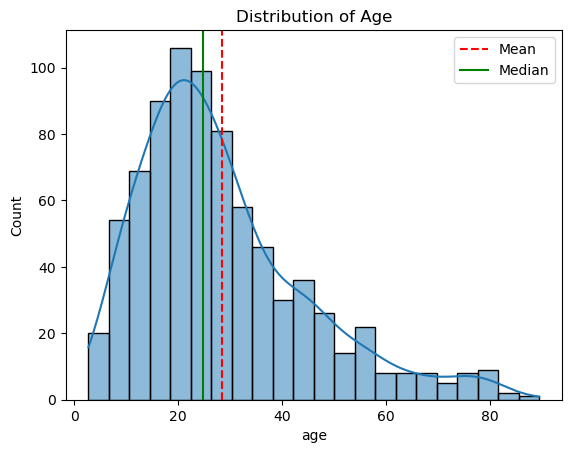

In [17]:
import seaborn as sns
sns.histplot(df["age"], kde=True)
plt.title("Distribution of Age")

# calculate mean and median
age_mean = df["age"].mean()
age_median = df["age"].median()

print("Mean:", age_mean)
print("Median:", age_median)


# add vertical lines for mean and median
plt.axvline(age_mean, color="red", linestyle="--", label="Mean")
plt.axvline(age_median, color="green", linestyle="-", label="Median")

plt.legend()

plt.show()

### Proportion of Autism Spectrum Disorder (ASD) Classes

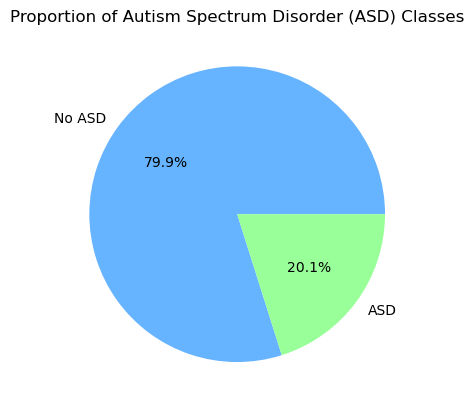

In [18]:
class_counts = df['Class/ASD'].value_counts()
plt.pie(class_counts.values, 
        labels=['No ASD', 'ASD'],  # Renamed the labels
        autopct='%1.1f%%', 
        colors=['#66b3ff', '#99ff99'])
plt.title("Proportion of Autism Spectrum Disorder (ASD) Classes")
plt.show()




In [27]:
ints = []
objects = []
floats = []

for col in df.columns:
    if pd.api.types.is_integer_dtype(df[col]):
        ints.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        objects.append(col)
    elif pd.api.types.is_float_dtype(df[col]):
        floats.append(col)

print("Integer Columns:", ints)
print("Object Columns:", objects)
print("Float Columns:", floats)


Integer Columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'jaundice', 'austim', 'used_app_before', 'Class/ASD']
Object Columns: ['gender', 'ethnicity', 'contry_of_res', 'age_desc', 'relation']
Float Columns: ['age', 'result']


In [28]:
print(df.dtypes)


ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice             int64
austim               int64
contry_of_res       object
used_app_before      int64
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object


In [26]:
# Categorization of Columns by Data Type
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
	  floats.append(col)


NameError: name 'int64' is not defined

In [29]:
ints.remove('ID')
ints.remove('Class/ASD')
ints

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'jaundice',
 'austim',
 'used_app_before']

In [30]:
floats

['age', 'result']

### Comparison of ASD result by Features

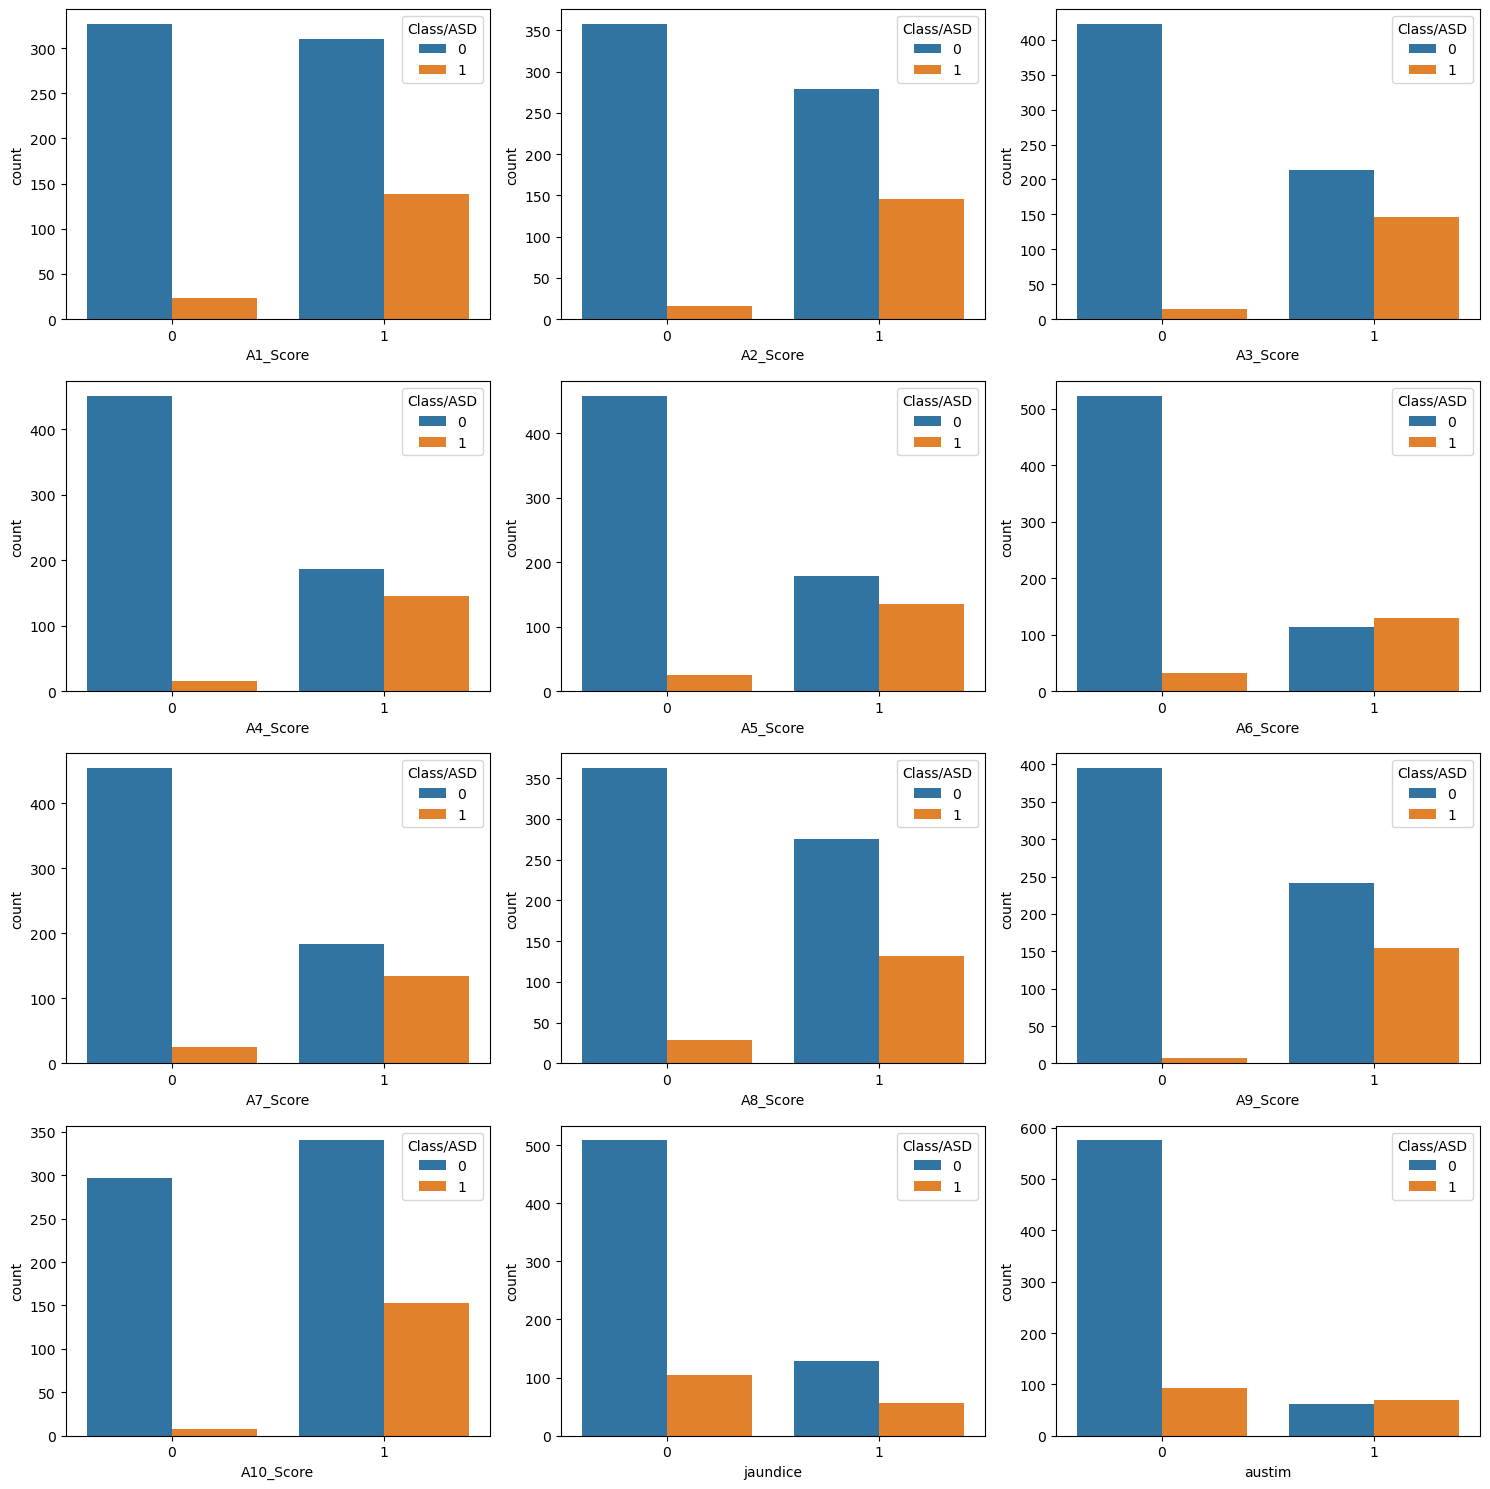

In [68]:
# Featuers with Data type Integer
plt.subplots(figsize=(15,15))
max_columns = 12
for i, col in enumerate(ints[:max_columns]):
    plt.subplot(4, 3, i + 1)
    sb.countplot(data=df, x=col, hue='Class/ASD')
plt.tight_layout()
plt.show()


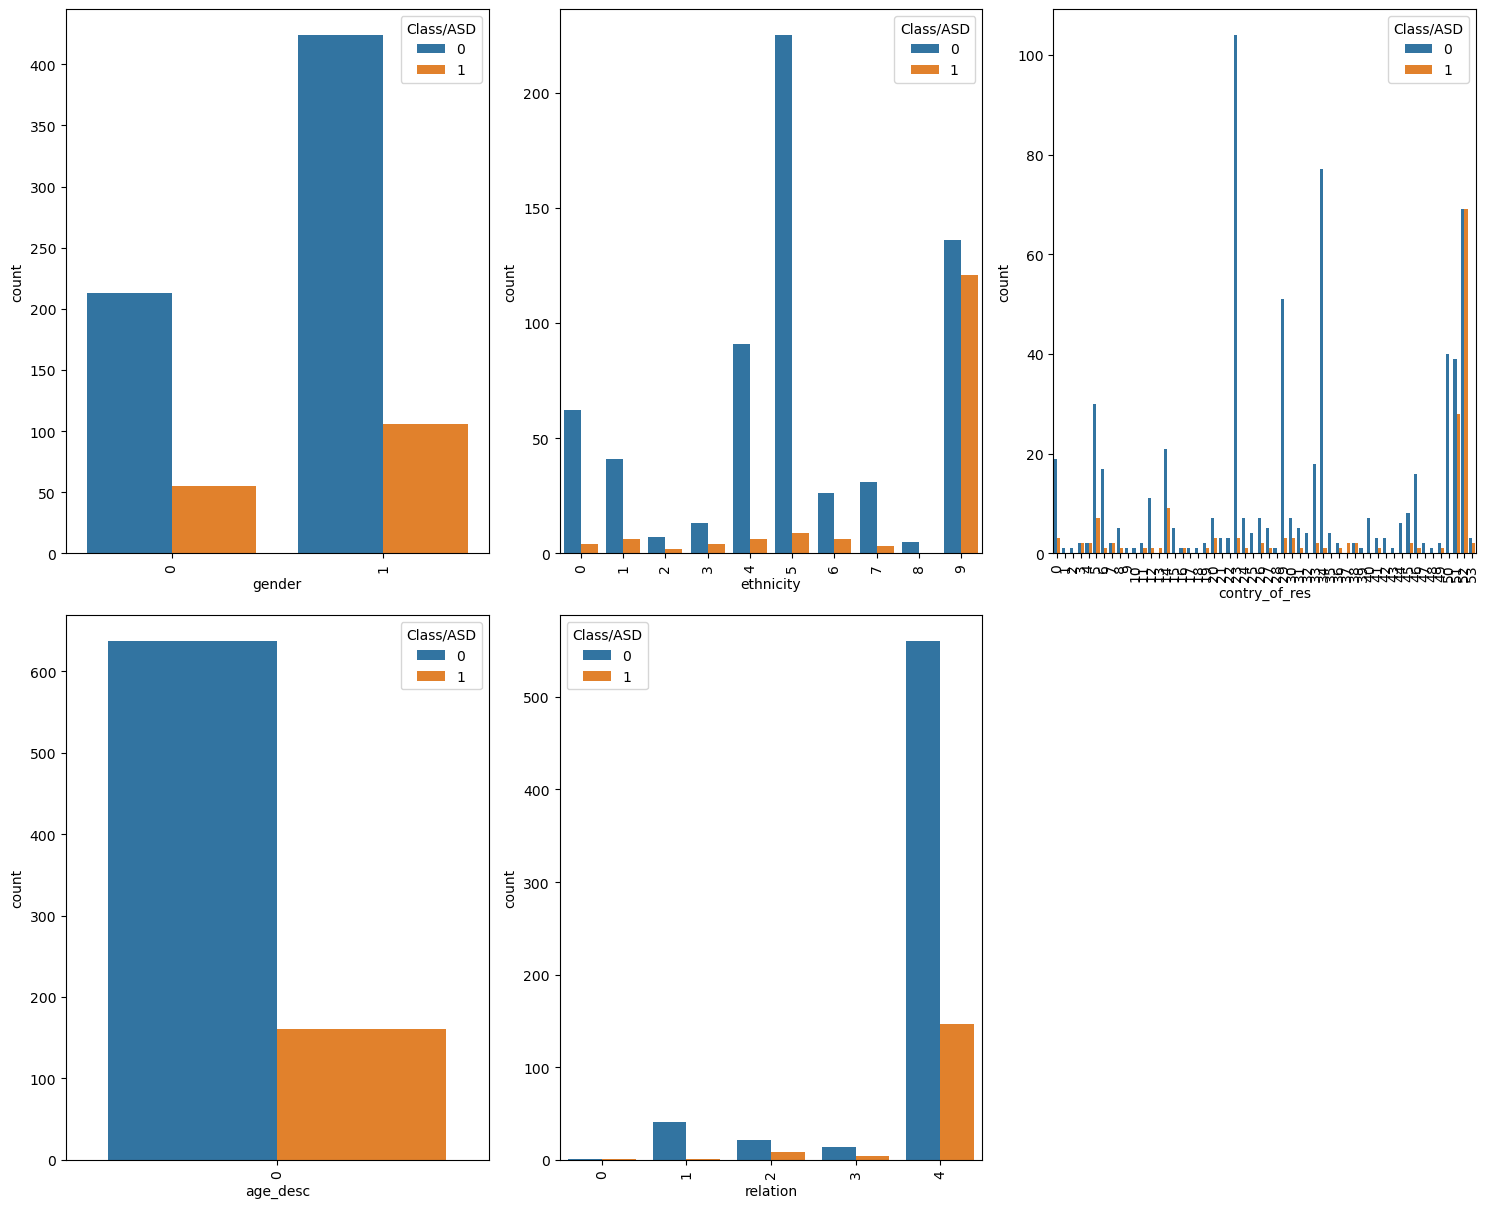

In [71]:
# Features with Data type object
plt.subplots(figsize=(15, 30))


for i, col in enumerate(objects):
	plt.subplot(5, 3, i+1)
	sb.countplot(data=df, x=col, hue=df['Class/ASD'])
	plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


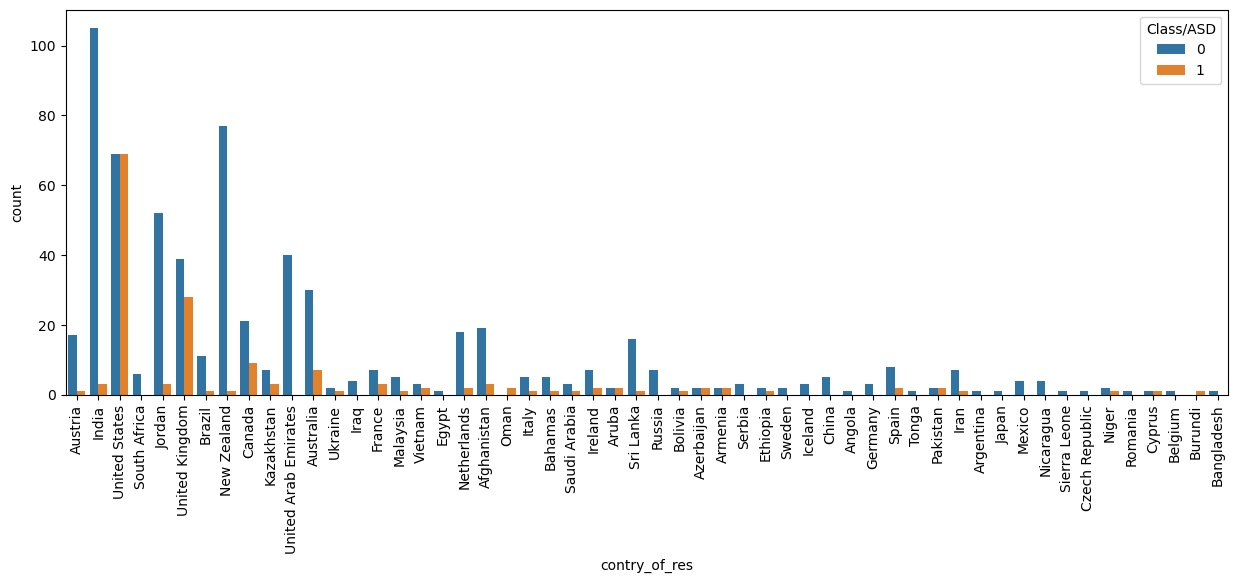

In [33]:

plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()


### Age and Result Distribution

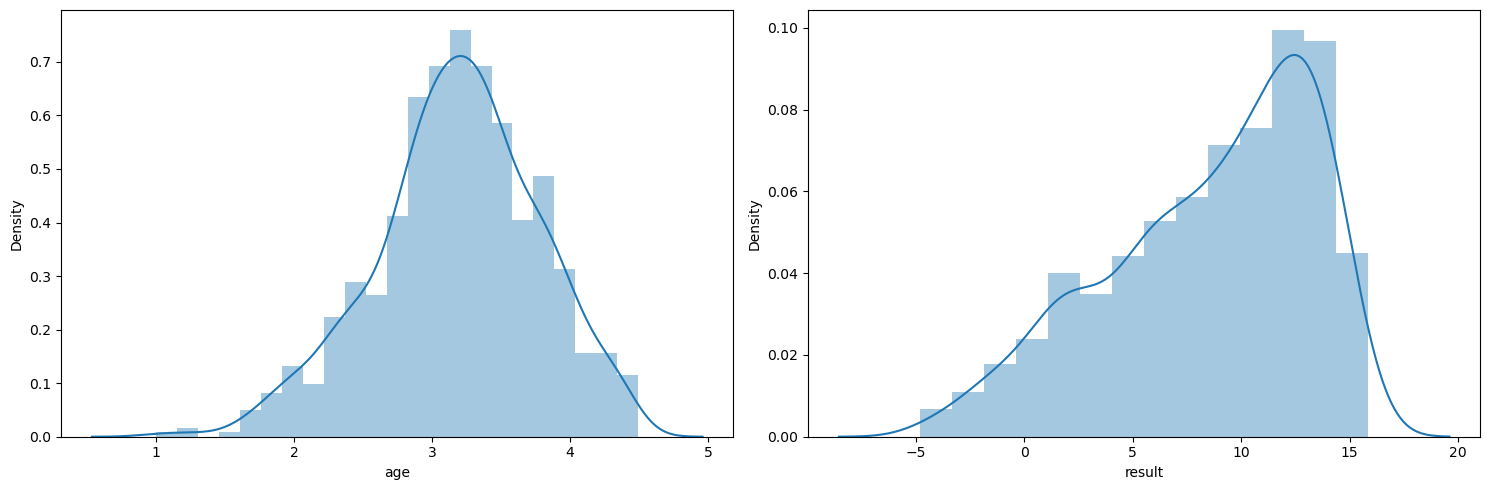

In [74]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


### Boxplot to detect outliers

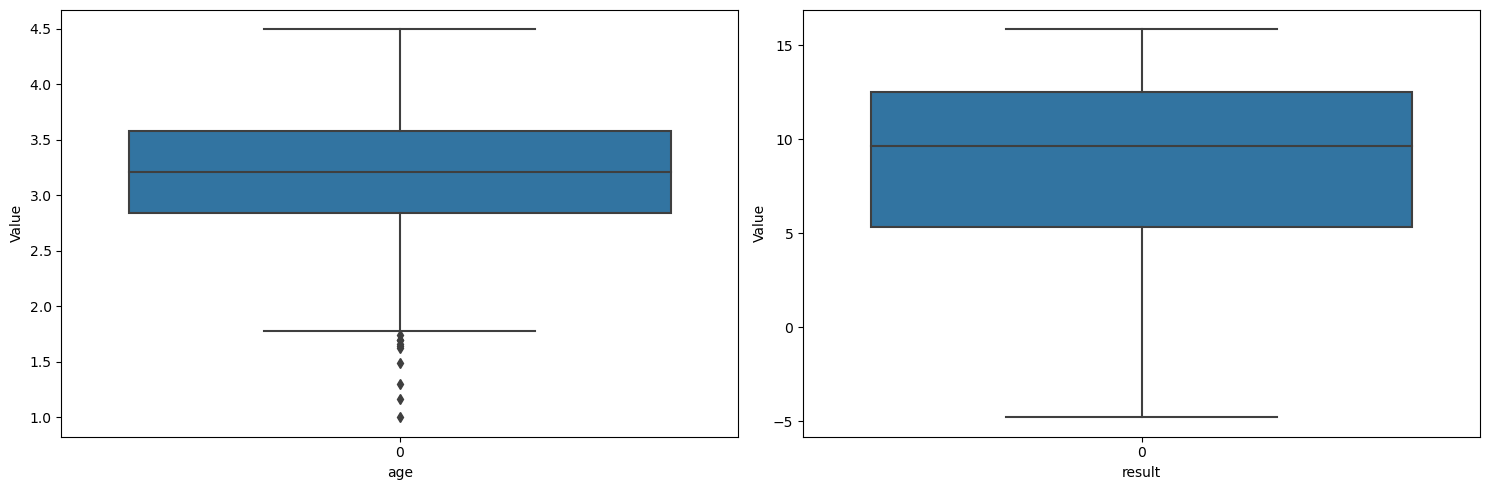

In [76]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
  plt.xlabel(col)
  plt.ylabel('Value')
plt.tight_layout()
plt.show()

In [36]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]
len(age_outliers)

35

In [37]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]
len(result_outliers)

1

In [38]:
df = df[df['result']>-5]
df.shape

(798, 22)

### Comparison of Age group with ASD

In [39]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)

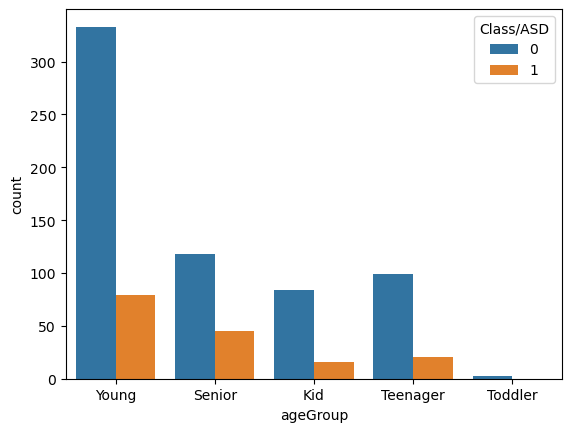

In [40]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()

### Comparison of Sum of Scores (A1-A10) with ASD

In [41]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)

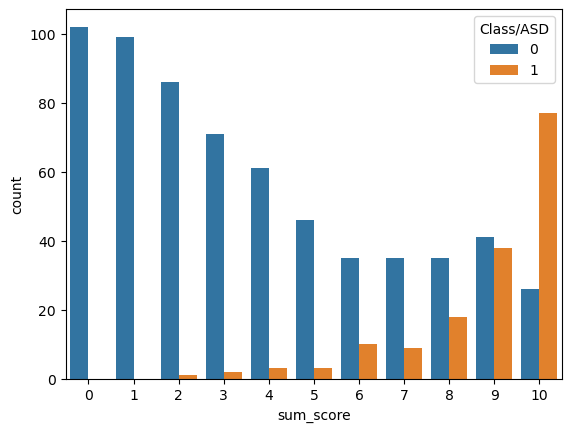

In [42]:

sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()

### Distribution with skewed data

In [43]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))

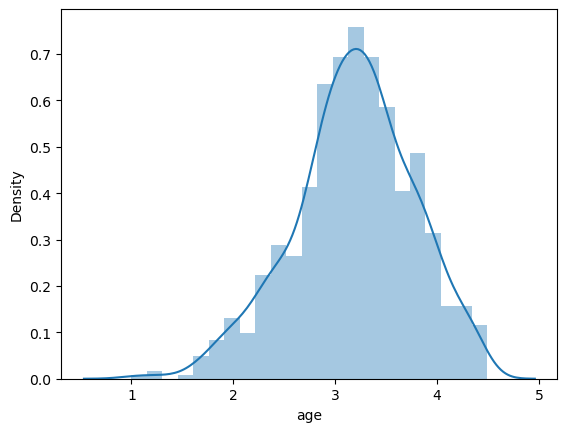

In [44]:

sb.distplot(df['age'])
plt.show()

## Hot Label Encoding

In [77]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)


### Correlation Matrix

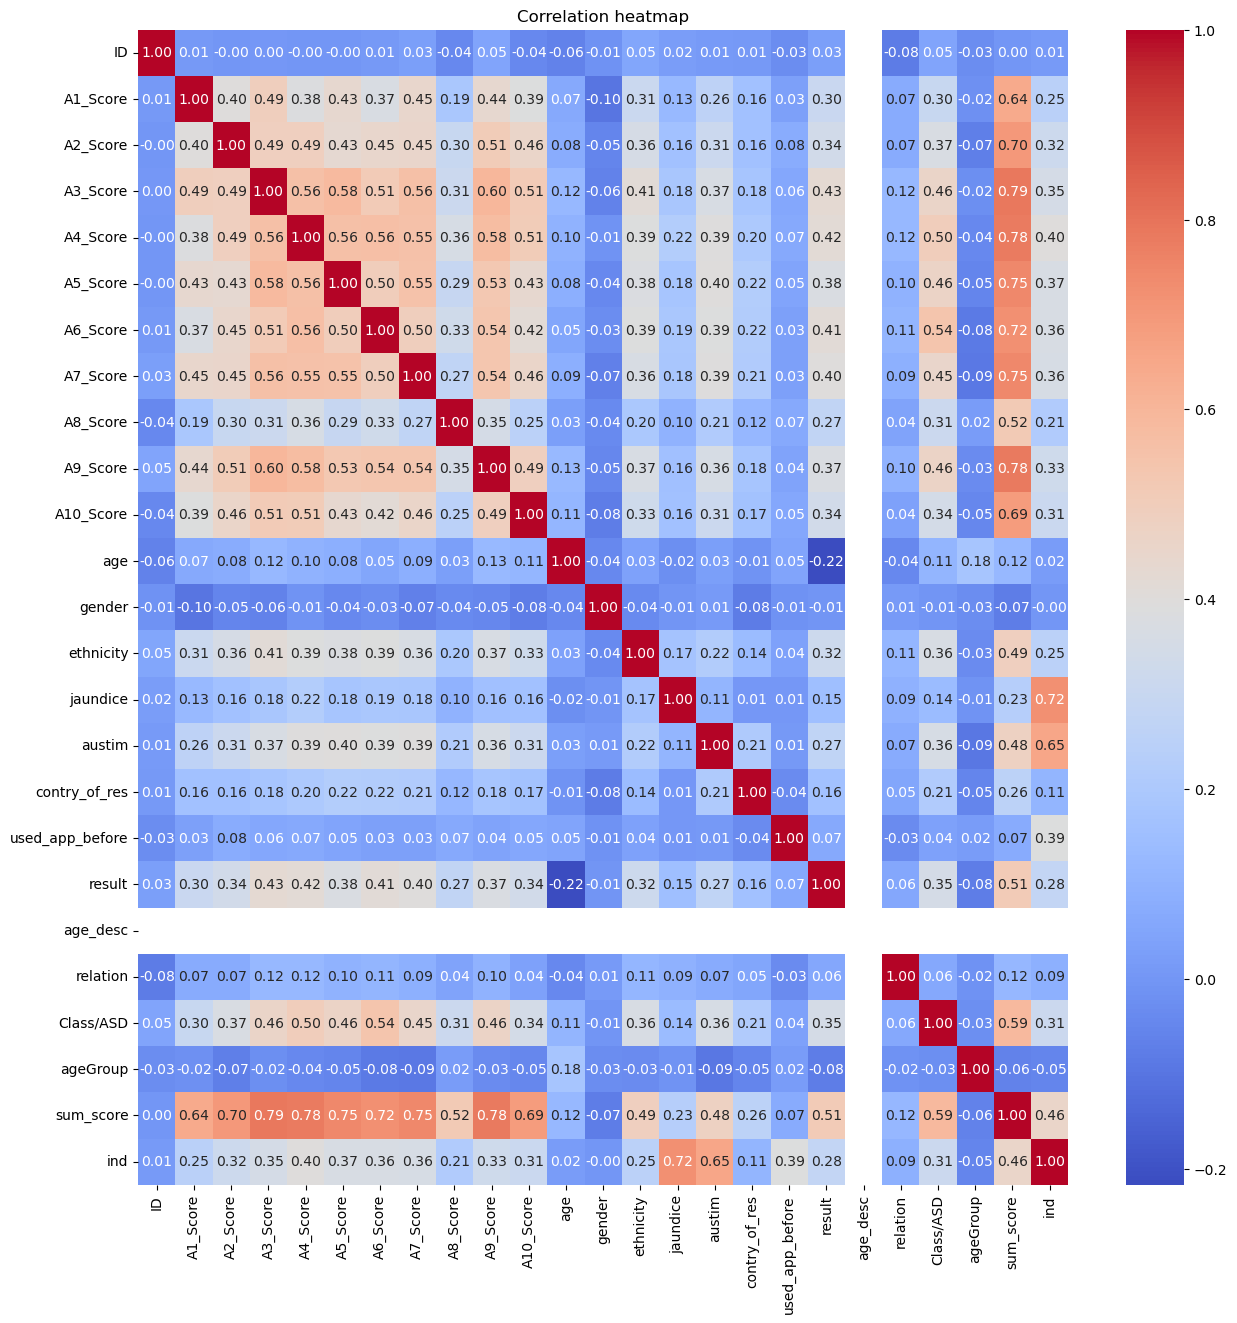

In [79]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

## Model Training

In [81]:
# Split Data into Test and Target
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']

In [82]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape

((1026, 20), (1026,))

In [83]:

# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)

### Neural Network Model

In [84]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build the deep learning model
model = Sequential()

# Input layer (this will match the number of features in your data)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dropout(0.2))  # Dropout for regularization

model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dropout(0.2))  # Dropout for regularization

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))


Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5781 - loss: 1.4357 - val_accuracy: 0.6625 - val_loss: 0.6248
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6954 - loss: 0.8382 - val_accuracy: 0.7688 - val_loss: 0.5586
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7171 - loss: 0.7019 - val_accuracy: 0.7688 - val_loss: 0.5051
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7610 - loss: 0.5298 - val_accuracy: 0.8062 - val_loss: 0.4624
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7275 - loss: 0.6339 - val_accuracy: 0.8062 - val_loss: 0.4309
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7464 - loss: 0.5094 - val_accuracy: 0.7937 - val_loss: 0.4087
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8215 - loss: 0.4219 - val_accuracy: 0.7812 - val_loss: 0.3982
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7751 - loss: 0.4312 - val_accuracy: 0.7937 - val_loss:

In [57]:
train_accuracy_dl = model.evaluate(X_train, Y_train, verbose=0)[1]  # Use X_train and Y_train
val_accuracy_dl = model.evaluate(X_val, Y_val, verbose=0)[1]  # Use X_val and Y_val

print(f'Deep Learning Model (Keras) : ')
print(f'Training Accuracy : {train_accuracy_dl:.4f}')
print(f'Validation Accuracy : {val_accuracy_dl:.4f}')

Deep Learning Model (Keras) : 
Training Accuracy : 0.8683
Validation Accuracy : 0.8250


###  Logistic Regression, XGBoost, SVC Models

In [59]:
# Dictionary to store results
models = {
    'Logistic Regression': LogisticRegression(),
    'XGBoost': XGBClassifier(),
    'SVC': SVC(kernel='rbf')
}
model_scores = {}
trained_models = {}

for model_name, model in models.items():
    print(f"Training {model_name} with default parameters...")
    model.fit(X, Y)
    train_accuracy = metrics.roc_auc_score(Y, model.predict(X))
    val_accuracy = metrics.roc_auc_score(Y_val, model.predict(X_val))

    # Store validation accuracy and trained model
    model_scores[model_name] = val_accuracy
    trained_models[model_name] = model  # Store the trained model instance

    print(f"{model_name} Training Accuracy: {train_accuracy}")
    print(f"{model_name} Validation Accuracy: {val_accuracy}")
    print("-" * 50)

# Get the model with the best validation accuracy
best_model_name = max(model_scores, key=model_scores.get)
best_model = trained_models[best_model_name]  # Retrieve the actual model instance
print(f"The best model is: {best_model_name} with Validation Accuracy: {model_scores[best_model_name]:.2f}")



Training Logistic Regression with default parameters...
Logistic Regression Training Accuracy: 0.8664717348927876
Logistic Regression Validation Accuracy: 0.7782258064516128
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost Training Accuracy: 1.0
XGBoost Validation Accuracy: 0.7190860215053765
--------------------------------------------------
Training SVC with default parameters...
SVC Training Accuracy: 0.9405458089668616
SVC Validation Accuracy: 0.7961469534050178
--------------------------------------------------
The best model is: SVC with Validation Accuracy: 0.80


### Confusion Matrix

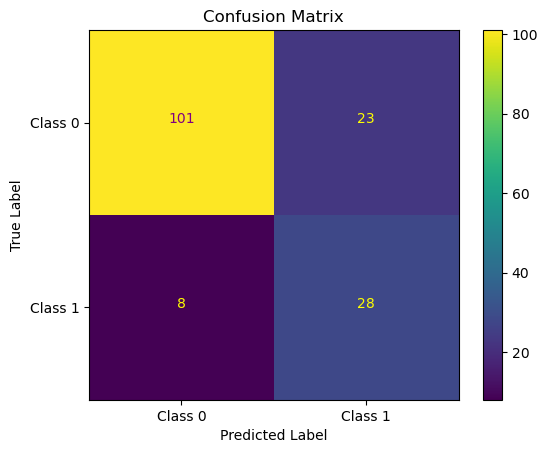

In [60]:
cm = confusion_matrix(Y_val, model.predict(X_val))
plt.imshow(cm, interpolation='nearest', cmap='viridis')
plt.colorbar()

classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
  for j in range(len(classes)):
    plt.text(j, i, str(cm[i, j]), horizontalalignment="center", color="purple" if cm[i, j] > cm.max() / 2 else "yellow")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Save Best Model

In [61]:
import pickle

# Save the model
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)



In [62]:
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)


## Predictions

In [63]:
print(type(loaded_model))  # Should show something like <class 'sklearn.linear_model.LogisticRegression'>


<class 'sklearn.svm._classes.SVC'>


In [64]:
predictions = loaded_model.predict(X_val)
print(predictions)

[0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0
 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1
 1 0 0 0 0 0 0 1 1 0 1 0]


In [65]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(Y_val, predictions))

print("Confusion Matrix:")
print(confusion_matrix(Y_val, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       124
           1       0.55      0.78      0.64        36

    accuracy                           0.81       160
   macro avg       0.74      0.80      0.76       160
weighted avg       0.84      0.81      0.82       160

Confusion Matrix:
[[101  23]
 [  8  28]]


In [66]:
comparison = list(zip(Y_val, predictions))
print("Actual vs Predicted:")
print(comparison[:10])  # First 10 comparisons


Actual vs Predicted:
[(0, 0), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (0, 0), (1, 1)]
